In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

bankinter = df[df['empresa'] == 'Bankinter']

bankinter.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

bankinter = bankinter [['date','open','high','low','close','adj close']]

bankinter.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

bankinter['date'] = pd.to_datetime(bankinter['date'], format="%Y-%m-%d")

bankinter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 11275 to 12599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

bankinter.sort_values(by='date',ascending= True, inplace=True)

bankinter.head()

,date,open,high,low,close,adj close
11275,2019-01-02,4.997591,5.049439,4.896775,5.026395,3.784958
12599,2019-01-03,4.990390,5.055200,4.954384,4.999031,3.764353
12268,2019-01-04,5.033596,5.177619,5.023515,5.154576,3.881480
12162,2019-01-07,5.151695,5.189141,5.107048,5.151695,3.879312
12161,2019-01-08,5.148815,5.259712,5.148815,5.210744,3.923777


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

bankinter = bankinter[(bankinter['date'] >= fecha_inicio) & (bankinter['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

bankinter.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=bankinter['date'].min(), end=bankinter['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

bankinter = bankinter.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

bankinter = bankinter.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

bankinter.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,3.227550,3.228991,3.103691,3.128175,2.615844
1,2021-01-05,3.110892,3.275798,3.110172,3.234752,2.704966
2,2021-01-06,3.301722,3.473829,3.280839,3.432063,2.869962
3,2021-01-07,3.447185,3.576086,3.386696,3.576086,2.990396
4,2021-01-08,3.600570,3.612091,3.501194,3.585447,2.998224
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,3.585447,3.610651,3.535039,3.549441,2.968116
8,2021-01-12,3.576806,3.587607,3.529998,3.542960,2.962696
9,2021-01-13,3.528558,3.557363,3.506235,3.553762,2.971729


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

bankinter = bankinter.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


bankinter.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,3.227550,3.228991,3.103691,3.128175,2.615844
1,2021-01-05,3.110892,3.275798,3.110172,3.234752,2.704966
2,2021-01-06,3.301722,3.473829,3.280839,3.432063,2.869962
3,2021-01-07,3.447185,3.576086,3.386696,3.576086,2.990396
4,2021-01-08,3.600570,3.612091,3.501194,3.585447,2.998224
5,2021-01-09,3.600570,3.612091,3.501194,3.585447,2.998224
6,2021-01-10,3.600570,3.612091,3.501194,3.585447,2.998224
7,2021-01-11,3.585447,3.610651,3.535039,3.549441,2.968116
8,2021-01-12,3.576806,3.587607,3.529998,3.542960,2.962696
9,2021-01-13,3.528558,3.557363,3.506235,3.553762,2.971729


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

bankinter = bankinter.set_index('date')

bankinter.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,3.227550,3.228991,3.103691,3.128175,2.615844
2021-01-05,3.110892,3.275798,3.110172,3.234752,2.704966
2021-01-06,3.301722,3.473829,3.280839,3.432063,2.869962
2021-01-07,3.447185,3.576086,3.386696,3.576086,2.990396
2021-01-08,3.600570,3.612091,3.501194,3.585447,2.998224
2021-01-09,3.600570,3.612091,3.501194,3.585447,2.998224
2021-01-10,3.600570,3.612091,3.501194,3.585447,2.998224
2021-01-11,3.585447,3.610651,3.535039,3.549441,2.968116
2021-01-12,3.576806,3.587607,3.529998,3.542960,2.962696


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

bankinter.index = pd.DatetimeIndex(bankinter.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

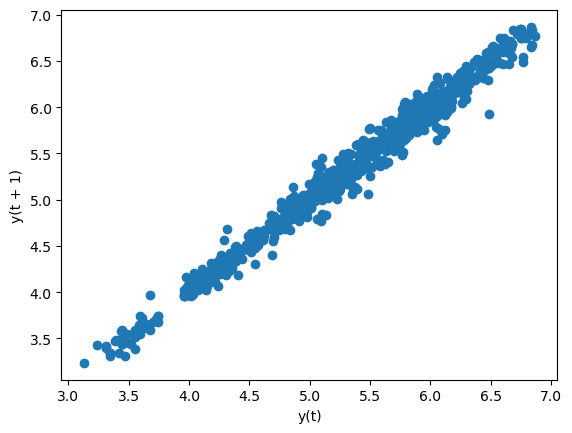

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(bankinter.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = bankinter.close[:-10], bankinter.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(bankinter.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    5.722424
2024-02-22    5.720862
2024-02-23    5.719316
2024-02-24    5.717784
2024-02-25    5.716267
2024-02-26    5.714765
2024-02-27    5.713276
2024-02-28    5.711802
2024-02-29    5.710342
2024-03-01    5.708896
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    5.728
2024-02-22    5.798
2024-02-23    5.810
2024-02-24    5.810
2024-02-25    5.810
2024-02-26    5.850
2024-02-27    5.888
2024-02-28    5.922
2024-02-29    5.868
2024-03-01    5.998
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.13262651665942488

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,5.728,5.722424,-0.005576
2024-02-22,5.798,5.720862,-0.077138
2024-02-23,5.810,5.719316,-0.090684
2024-02-24,5.810,5.717784,-0.092216
2024-02-25,5.810,5.716267,-0.093733
2024-02-26,5.850,5.714765,-0.135235
2024-02-27,5.888,5.713276,-0.174724
2024-02-28,5.922,5.711802,-0.210198
2024-02-29,5.868,5.710342,-0.157658
2024-03-01,5.998,5.708896,-0.289104
